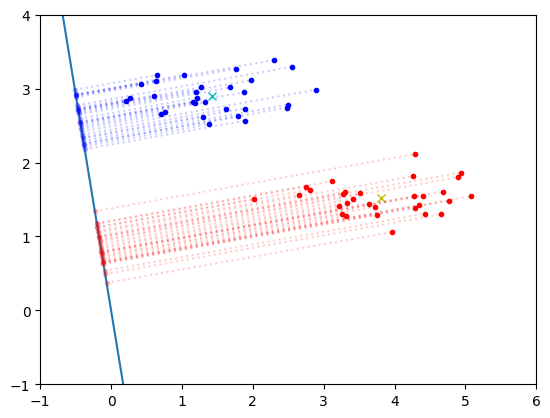

In [21]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.multivariate_normal((1.5, 3), [[0.5, 0], [0, .05]], 30)
b = np.random.multivariate_normal((4, 1.5), [[0.5, 0], [0, .05]], 30)
mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
Sw = np.cov(a.T) + np.cov(b.T)
inv_S = np.linalg.inv(Sw)
res = inv_S.dot(mu_a-mu_b)  # the trick

####
# more general solution
#
# Sb = (mu_a-mu_b)*((mu_a-mu_b).T)
# eig_vals, eig_vecs = np.linalg.eig(inv_S.dot(Sb))
# res = sorted(zip(eig_vals, eig_vecs), reverse=True)[0][1] # take only eigenvec corresponding to largest (and the only one) eigenvalue
# res = res / np.linalg.norm(res)

plt.axis([-1, 6, -1, 4])
plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r.')
plt.plot([-res[0], res[0]], [-res[1], res[1]]) # this is the solution

# central
plt.plot(mu_a[0], mu_a[1], 'cx')
plt.plot(mu_b[0], mu_b[1], 'yx')
#plt.gca().axis('square')

# let's project data point on it

# 虛線
r = res.reshape(2,)
n2 = np.linalg.norm(r)**2
for pt in a:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.2)
for pt in b:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.2)
